#### Name Dipika Sharma
#### DSC 550 T302 Data Mining
#### Week 10

## Exercise 10.2

### Building a CNN Image Classifier

### 1. Load the MNIST data set.

In [1]:
## Lets install keras and tensorflow packages
! pip install keras
! pip install tensorflow

  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.2
    Uninstalling Keras-2.2.2:
      Successfully uninstalled Keras-2.2.2


In [2]:
## Lets import all requiied libraries
import numpy as np
import pandas as pd
from keras.datasets import mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import utils as np_utils
from keras import backend as K
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

2023-08-09 22:42:23.431678: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
## Lets load MNIST data

(data_train, target_train), (data_test, target_test) = mnist.load_data()

In [4]:
## lets check the number of rows and columns of training and test datasets.

print("The shape of training dataset is: {}".format(data_train.shape))
print("The shape of testing dataset is: {}".format(data_test.shape))

The shape of training dataset is: (60000, 28, 28)
The shape of testing dataset is: (10000, 28, 28)


### 2. Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

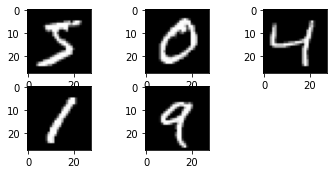

In [5]:
## Lets display the first 5 images.

## Importing require library.

from matplotlib import pyplot

for i in range(5):
    ## Using subplot to display images.
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(data_train[i], cmap=pyplot.get_cmap('gray'))
    
## Display the images.

pyplot.show()

### 3. Build and train a Keras CNN classifier on the MNIST training set.

In [6]:
## Lets set the color channel value

K.set_image_data_format("channels_last")

In [7]:
## Lets set the seed

np.random.seed(0)

In [8]:
## Lets set the image information

channels = 1
height = 28
width = 28

In [9]:
## Lets check the shape of the dataset now.

data_train = data_train.reshape((data_train.shape[0], 28, 28, 1))
data_test = data_test.reshape((data_test.shape[0], 28, 28, 1))

In [10]:
## Lets set the pixel intensity to between 0 and 1

features_train = data_train / 255
features_test = data_test / 255

In [11]:
from tensorflow import keras

In [12]:
## Lets encode the target

target_train = keras.utils.to_categorical(target_train)

target_test = keras.utils.to_categorical(target_test)

number_of_classes = target_test.shape[1]

In [13]:
## Lets begin the neural network

network = Sequential()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [15]:
## Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function

network.add(Conv2D(filters=64,kernel_size=(5, 5), input_shape=(height, width, channels), activation='relu'))

In [16]:
## Add max pooling layer with a 2x2 window

network.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
## Add dropout layer

network.add(Dropout(0.5))

In [18]:
## Add layer to flatten input

network.add(Flatten())

In [19]:
## Add fully connected layer of 128 units with a ReLU activation function

network.add(Dense(128, activation="relu"))

In [20]:
## Add dropout layer

network.add(Dropout(0.5))

In [21]:
## Add fully connected layer with a softmax activation function

network.add(Dense(number_of_classes, activation="softmax"))

In [22]:
## Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
 optimizer="rmsprop", # Root Mean Square Propagation
 metrics=["accuracy"]) # Accuracy performance metric

In [23]:
## Train neural network
network.fit(features_train, # Features
            target_train, # Target
            epochs=2, # Number of epochs
            verbose=0, # Don't print description after each epoch
            batch_size=1000, # Number of observations per batch
            validation_data=(features_test, target_test)) # Data for evaluation


In [24]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [25]:
## Lets make predictions on test set

pred = network.predict(data_test)

313/313 [==============================] - 1s 2ms/step


In [26]:
## Prepare values for confusion matrix

y_preds = np.argmax(pred, axis=1)

In [27]:
## Lets check the shape of target_test

target_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
## Prepare values for confusion matrix

y_true = np.argmax(target_test, axis=1)

### 4. Report the test accuracy of your model.

In [29]:
## Lets calculate the test accuracy.

accuracy = accuracy_score(y_true, y_preds)
precision = precision_score(y_true, y_preds, average='micro')
recall = recall_score(y_true, y_preds, average='micro')
f1 = f1_score(y_true, y_preds, average='micro')

In [30]:
print("Accuracy of model is : {}".format(accuracy))
print("Precision is : {}".format(precision))
print("Recall of the model is : {}".format(recall))
print("F1 score of the model is : {}".format(f1))

Accuracy of model is : 0.9699
Precision is : 0.9699
Recall of the model is : 0.9699
F1 score of the model is : 0.9699


In [31]:
## Lets display the classification report.

print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.96      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.99      0.97      0.98       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.95      0.96      0.95       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### 5. Display a confusion matrix on the test set classifications.

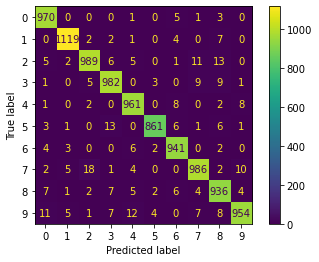

In [32]:
## Lets display the confusion matrix.

conf_matrix = confusion_matrix(y_true, y_preds)
cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0,1,2,3,4,5,6,7,8,9])
cm.plot()
pyplot.show()

### 6. Summarize your results.

#### Build the convolutional network using the image data process. we use the MNIST training set and trained the keras CNN classifier. Once we completed the model and trained the model on the training set, we use the model to make prediction on test set. The accuracy of the model on the test set is 97%. We also visualize the confusion matrix and we learned that the model is correctly classified True positive class which means that the predicted values matches with the actual or true value. Hence the model performed well.
